In [1]:
import warnings
import scanpy as sc
import anndata as an
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from urllib import request
import scanorama
import os

sc.settings.set_figure_params(dpi=70)
# sc.set_figure_params(facecolor="white", figsize=(8, 8))
sc.logging.print_header()
sc.settings.verbosity = 3


scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.22.4 scipy==1.9.1 pandas==1.4.2 scikit-learn==1.1.2 statsmodels==0.13.2 python-igraph==0.9.9 louvain==0.7.1 pynndescent==0.5.7


In [2]:
adata = sc.read_10x_h5('../raw_feature_bc_matrix.h5')
adata

reading ../raw_feature_bc_matrix.h5
 (0:00:09)


AnnData object with n_obs × n_vars = 6794880 × 5358
    var: 'gene_ids', 'feature_types', 'genome'

filtered out 6790325 cells that have less than 200 genes expressed
filtered out 339 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:00)


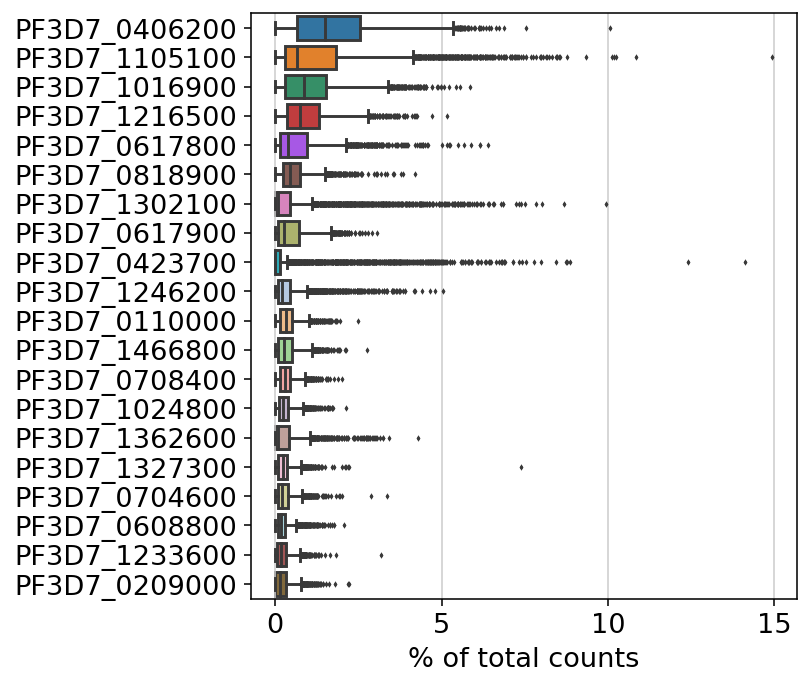

In [3]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)
sc.pl.highest_expr_genes(adata, n_top=20, )

In [4]:
# mitochondrial genes
adata.var['mt'] = adata.var_names.str.startswith('MT-') 
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
# ribosomal genes
adata.var['ribo'] = adata.var_names.str.startswith(("RPS","RPL"))
sc.pp.calculate_qc_metrics(adata, qc_vars=['ribo'], percent_top=None, log1p=False, inplace=True)
# hemoglobin genes.
adata.var['hb'] = adata.var_names.str.contains(("^HB[^(P)]"))
sc.pp.calculate_qc_metrics(adata, qc_vars=['hb'], percent_top=None, log1p=False, inplace=True)


adata.obs['total_counts'] = adata.X.sum(axis=1).A1
adata.var

,gene_ids,feature_types,genome,n_cells,mt,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,ribo,hb
PF3D7_1401000,PF3D7_1401000,Gene Expression,Plasmodium_falciparum.ASM276v2_MM,3,False,3,0.000878,99.934138,4.0,False,False
PF3D7_1401100,PF3D7_1401100,Gene Expression,Plasmodium_falciparum.ASM276v2_MM,10,False,10,0.002415,99.780461,11.0,False,False
PF3D7_1401200,PF3D7_1401200,Gene Expression,Plasmodium_falciparum.ASM276v2_MM,7,False,7,0.001537,99.846323,7.0,False,False
PF3D7_1401300,PF3D7_1401300,Gene Expression,Plasmodium_falciparum.ASM276v2_MM,448,False,448,0.113721,90.164654,518.0,False,False
PF3D7_1401400,PF3D7_1401400,Gene Expression,Plasmodium_falciparum.ASM276v2_MM,95,False,95,0.023052,97.914380,105.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...
PF3D7_0114500,PF3D7_0114500,Gene Expression,Plasmodium_falciparum.ASM276v2_MM,12,False,12,0.002634,99.736553,12.0,False,False
PF3D7_0115000,PF3D7_0115000,Gene Expression,Plasmodium_falciparum.ASM276v2_MM,18,False,18,0.004830,99.604830,22.0,False,False
PF3D7_0115100,PF3D7_0115100,Gene Expression,Plasmodium_falciparum.ASM276v2_MM,42,False,42,0.010099,99.077936,46.0,False,False
PF3D7_0115600,PF3D7_0115600,Gene Expression,Plasmodium_falciparum.ASM276v2_MM,3,False,3,0.000659,99.934138,3.0,False,False


In [5]:
#sc.pp.calculate_qc_metrics(adata, qc_vars=['mt','ribo','hb'], percent_top=None, log1p=False, inplace=True)

In [6]:
adata

AnnData object with n_obs × n_vars = 4555 × 5019
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'ribo', 'hb'

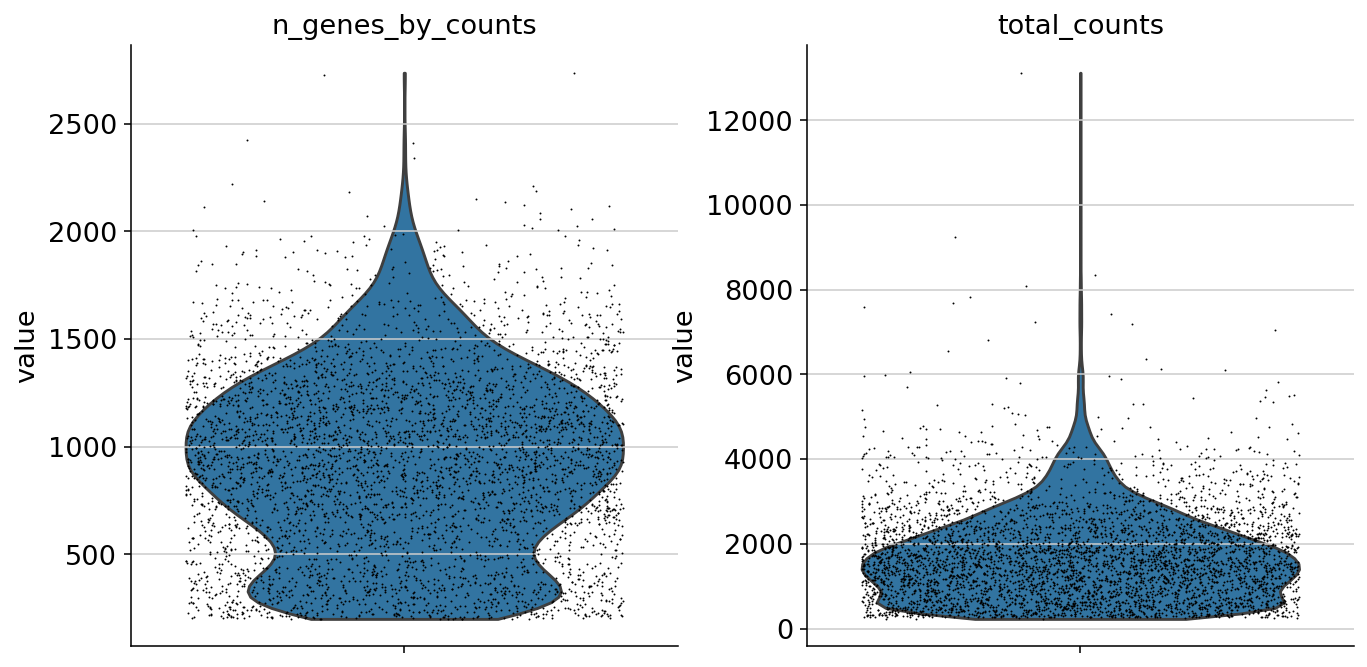

In [7]:
variables = ['n_genes_by_counts', 'total_counts']
sc.pl.violin(adata, keys=variables, jitter=0.4, rotation= 45, multi_panel=True)

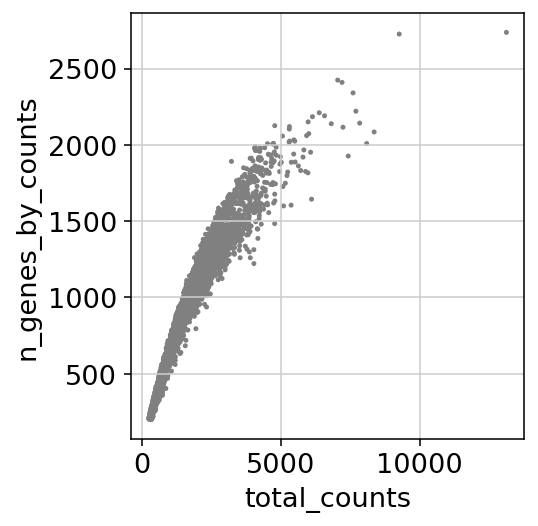

In [8]:
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [9]:
print(adata.n_obs, adata.n_vars)

4555 5019


In [10]:
# save normalized counts in raw slot.
adata.raw = adata

# normalize to depth 10000 UMIs per cell
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)

# logaritmize
sc.pp.log1p(adata)
# scale
#sc.pp.scale(adata)

normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


In [11]:
adata.raw

In [12]:
# Create folder
os.makedirs('./results/supplementary_files', exist_ok=True)

In [13]:
# Load gene list from file
cell_cycle_genes = [x.strip() for x in open('../cc_genesMMS.txt')]

# Split into 2 lists
s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]

# Filter out genes not detectd in our dataset 
cell_cycle_genes = [x for x in cell_cycle_genes if x in adata.var_names]

In [14]:
sc.tl.score_genes_cell_cycle(adata, s_genes=s_genes, g2m_genes=g2m_genes)

calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    681 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    953 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)


/home/mubasher/.conda/envs/spatial/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):
/home/mubasher/.conda/envs/spatial/lib/python3.9/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


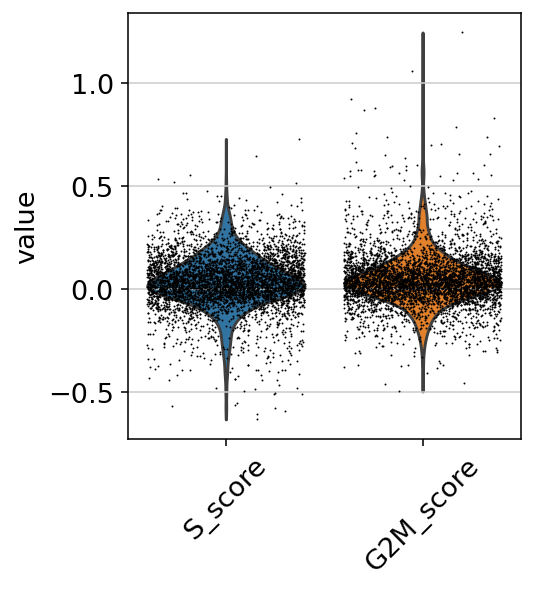

In [15]:
sc.pl.violin(adata, ['S_score', 'G2M_score'], jitter=0.4, rotation=45)

In [175]:
#import scrublet as scr
#scrub = scr.Scrublet(adata.raw.X)
#adata.obs['doublet_scores'], adata.obs['predicted_doublets'] = scrub.scrub_doublets()
#scrub.plot_histogram()

#sum(adata.obs['predicted_doublets'])

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.50
Detected doublet rate = 0.8%
Estimated detectable doublet fraction = 22.9%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 3.5%
Elapsed time: 4.3 seconds


37

In [176]:
#adata.obs['doublet_info'] = adata.obs["predicted_doublets"].astype(str)

In [177]:
#sc.pl.violin(adata, 'n_genes_by_counts',jitter=0.4, groupby = 'doublet_info', rotation=45)

In [16]:
sc.pp.highly_variable_genes(
    adata, n_top_genes=5000,
    inplace=True)
print("Highly variable genes: %d"%sum(adata.var.highly_variable))

If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
Highly variable genes: 5000


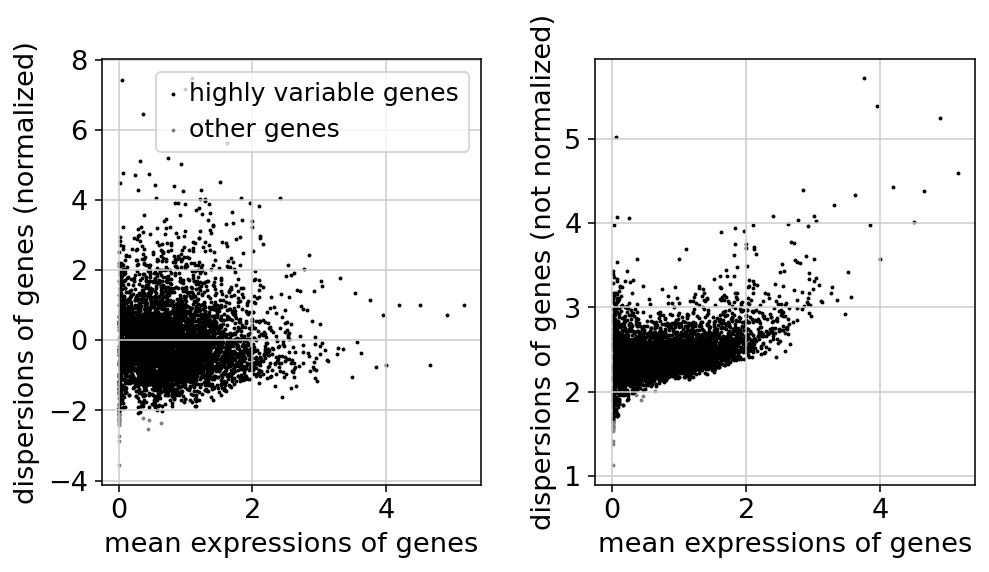

In [17]:
#plot variable genes
sc.pl.highly_variable_genes(adata)

# subset for variable genes in the dataset
#adata = adata[:, adata.var['highly_variable']]

In [18]:
# adata = adata.copy()     #run this line if you get the "AttributeError: swapaxes not found" 
#adata.raw = adata
# regress out unwanted variables
sc.pp.regress_out(adata, ['total_counts'])

# scale data, clip values exceeding standard deviation 10.
sc.pp.scale(adata)

regressing out ['total_counts']
    sparse input is densified and may lead to high memory use
    finished (0:00:24)


In [19]:
adata.var.highly_variable

PF3D7_1401000    True
PF3D7_1401100    True
PF3D7_1401200    True
PF3D7_1401300    True
PF3D7_1401400    True
                 ... 
PF3D7_0114500    True
PF3D7_0115000    True
PF3D7_0115100    True
PF3D7_0115600    True
PF3D7_0115700    True
Name: highly_variable, Length: 5019, dtype: bool

In [20]:
sc.tl.pca(
    data = adata, 
    svd_solver = 'arpack',
    n_comps = 50,
    use_highly_variable = True)

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:06)


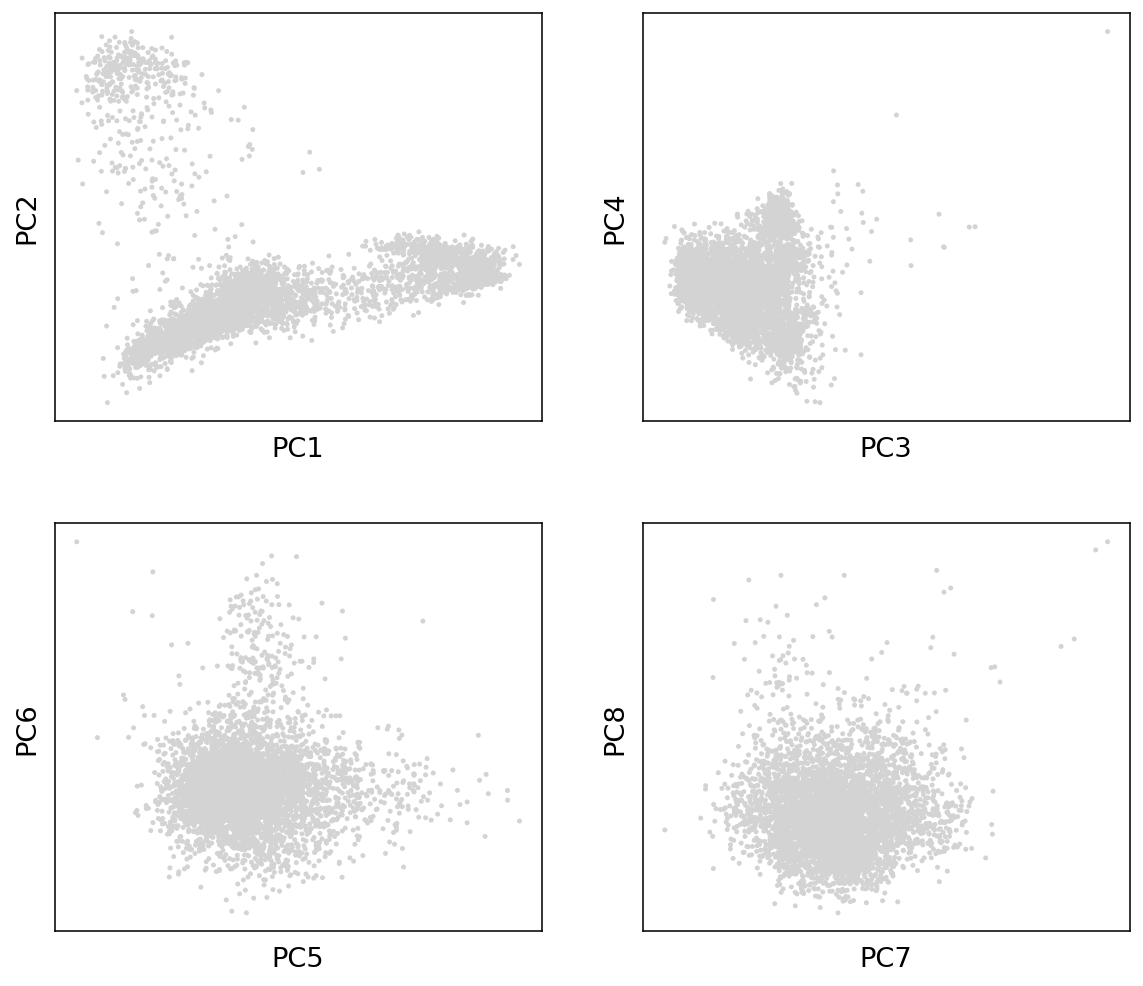

In [21]:
sc.pl.pca(adata, components = ['1,2','3,4','5,6','7,8'], ncols=2)

In [22]:
sc.pp.neighbors(adata, n_pcs = 10, n_neighbors = 20)

computing neighbors
    using 'X_pca' with n_pcs = 10
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:03)


In [23]:
sc.tl.umap(adata,min_dist=0.3,spread=0.5,maxiter=150)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:05)


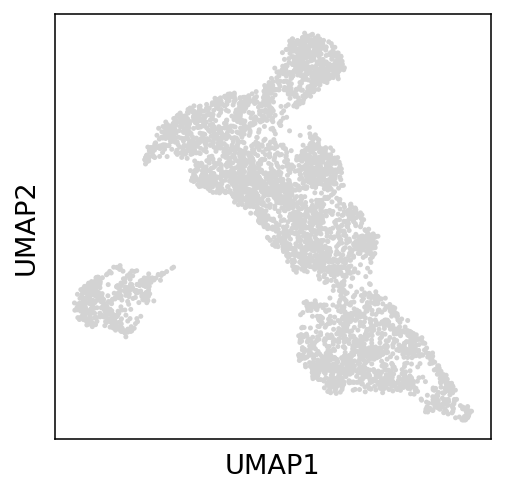

In [24]:
sc.pl.umap(adata)

In [25]:
resolutions = [0.4,0.6,0.8,0.9,1.0,1.1,1.2,1.4,1.6]

In [26]:
for i in resolutions:
    sc.tl.louvain( adata, resolution = i, key_added = "louvain_"+str(i) )
    sc.tl.leiden(  adata, resolution = i, key_added = "leiden_"+str(i) )

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 8 clusters and added
    'louvain_0.4', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 10 clusters and added
    'leiden_0.4', the cluster labels (adata.obs, categorical) (0:00:00)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 9 clusters and added
    'louvain_0.6', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 11 clusters and added
    'leiden_0.6', the cluster labels (adata.obs, categorical) (0:00:00)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 10 clusters and added
    'louvain_0.8', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 12 clusters and added
    'leiden_0.8', the cluster labels (adata.obs, categorical) (0:00:00)
running Louv

In [27]:
all_clusterings = [ ('louvain_'+str(i)) for i in resolutions] + [ ('leiden_'+str(i)) for i in resolutions ]

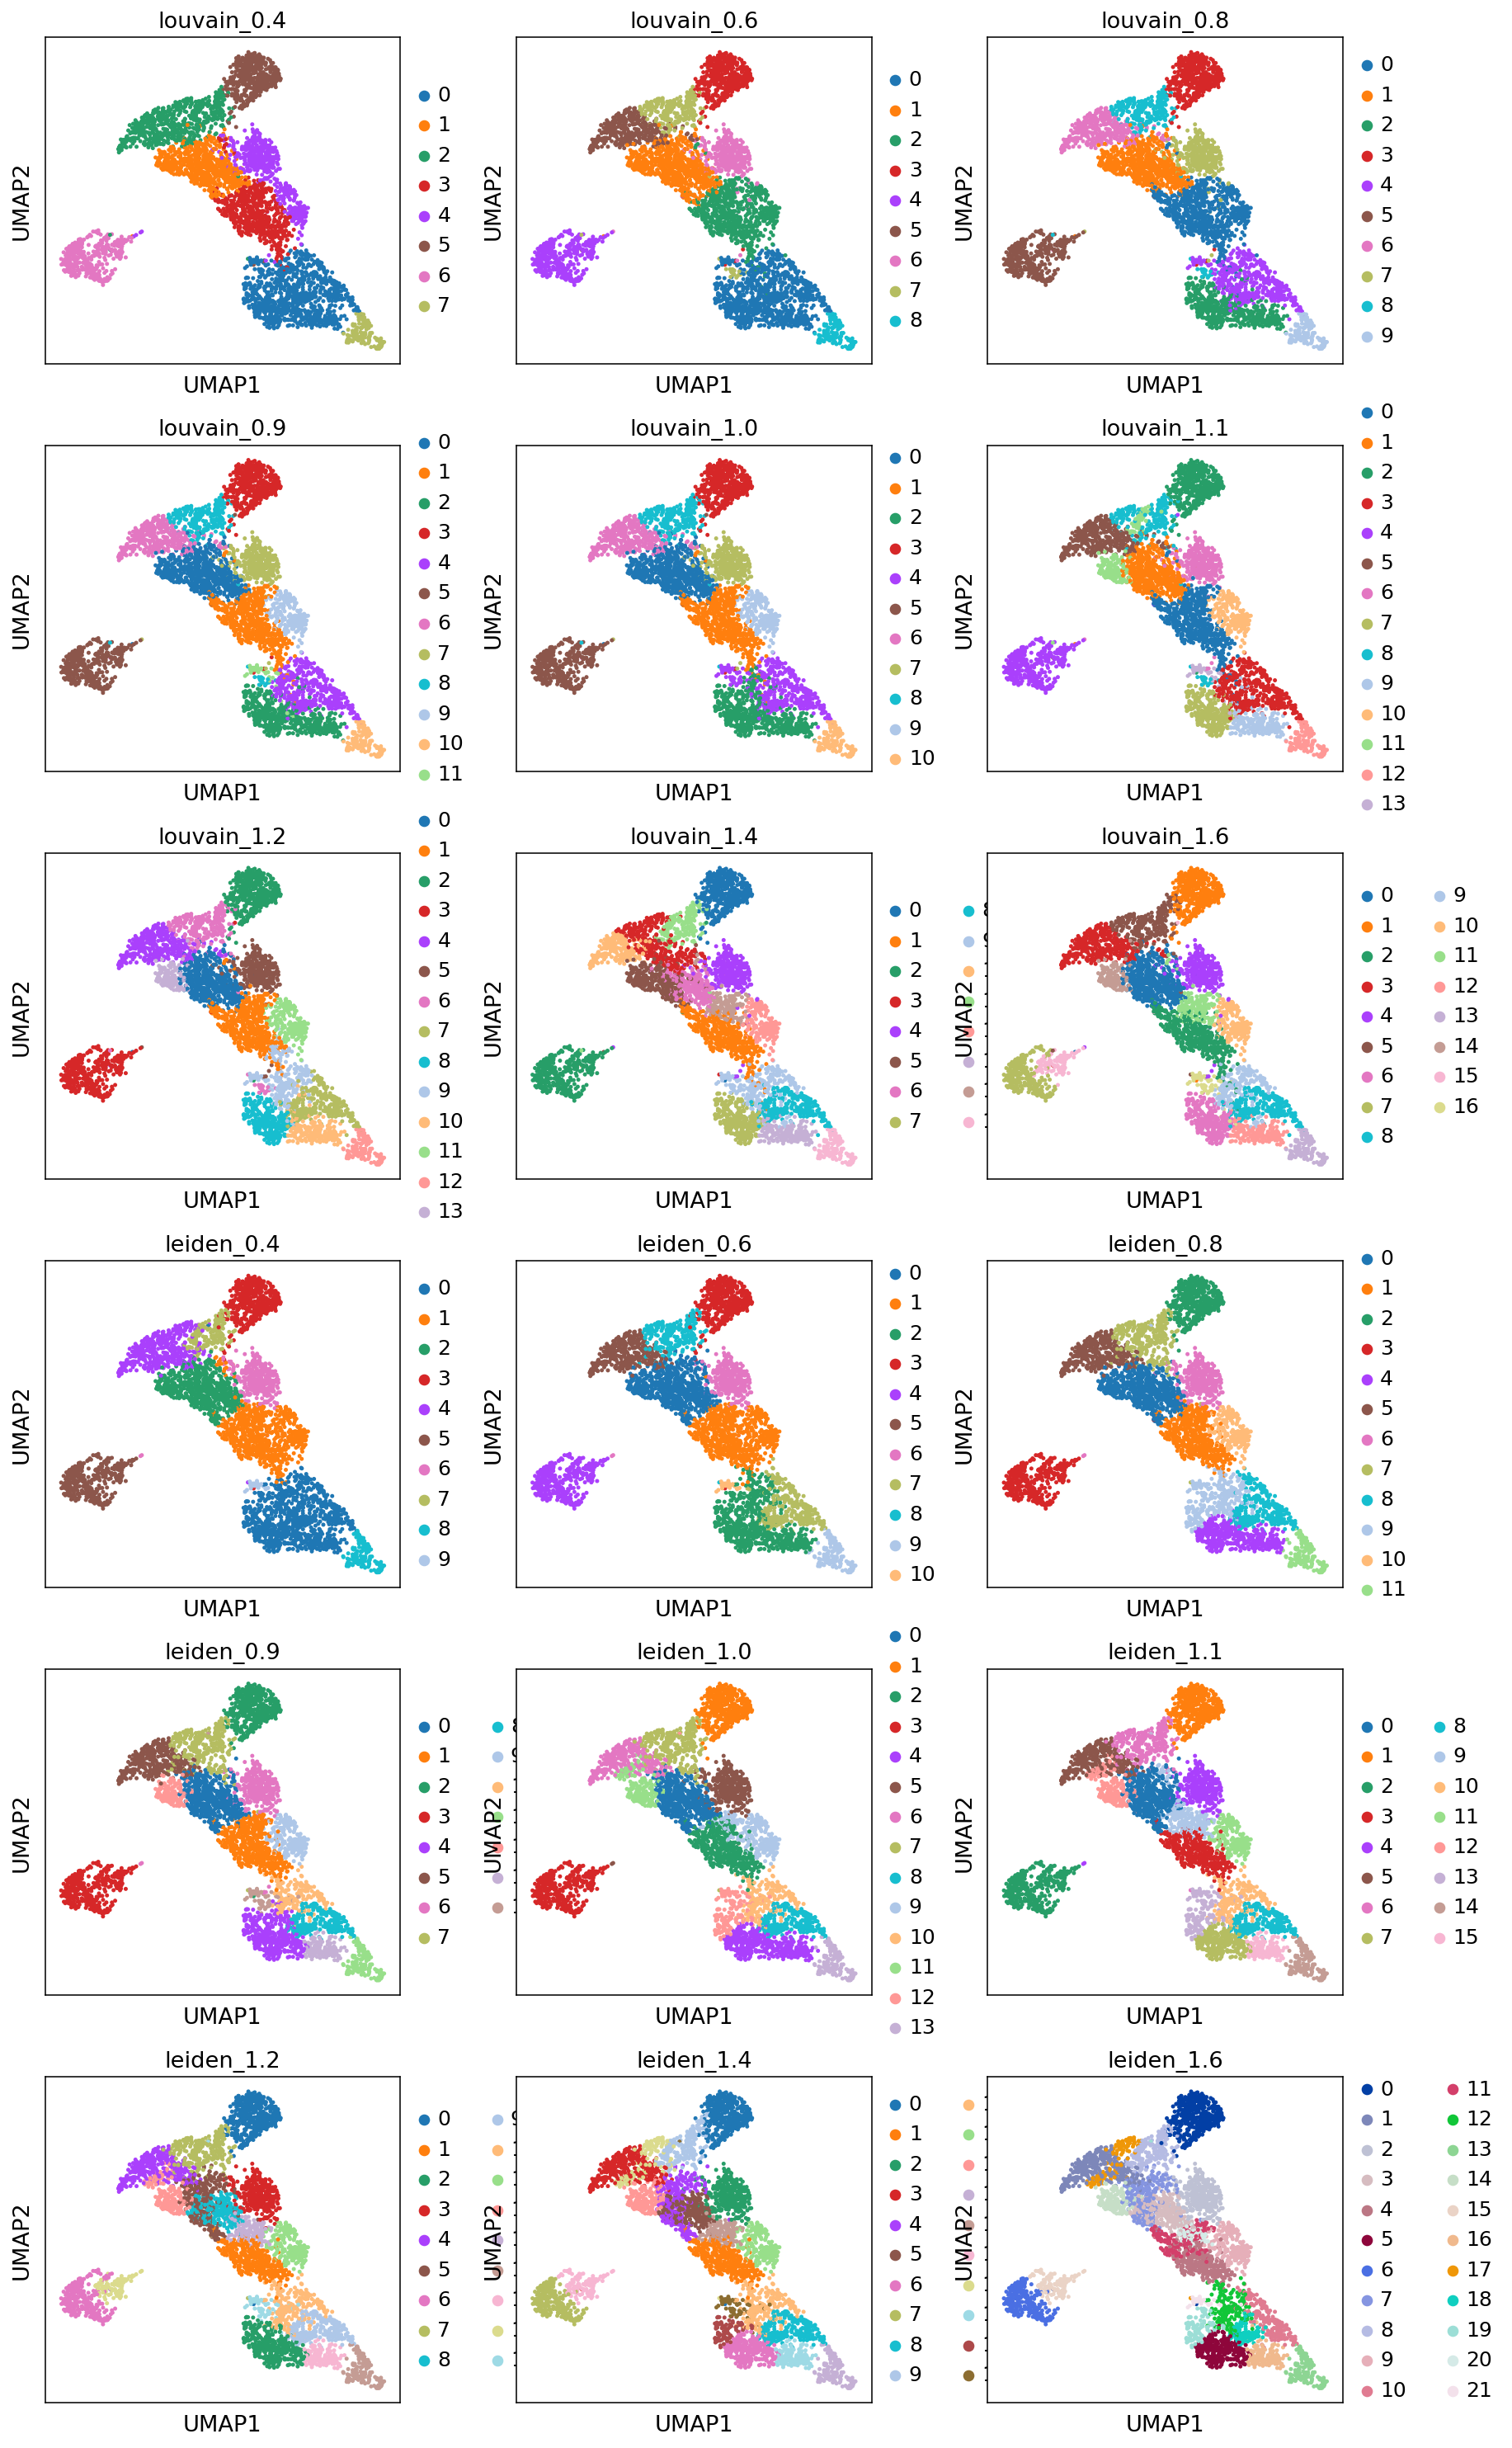

In [28]:
sc.pl.umap(adata = adata, color=all_clusterings , ncols=3 )

In [33]:
os.makedirs('../results/single_cell', exist_ok=True)
adata.write_h5ad('../results/single_cell/single_cell_10X.h5ad')

In [39]:
sc.tl.rank_genes_groups(
    adata = adata, 
    groupby = 'louvain_1.0', 
    method = 'wilcoxon', 
    use_raw = False, 
    key_added = "wilcoxon",n_genes=100)

ranking genes
    finished: added to `.uns['wilcoxon']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:06)


/home/mubasher/.conda/envs/spatial/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/mubasher/.conda/envs/spatial/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/mubasher/.conda/envs/spatial/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/mubasher/.conda/envs/spatial/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/mubasher/.conda/envs/spatial/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: invalid value encountered in log2
  self.stats[group_

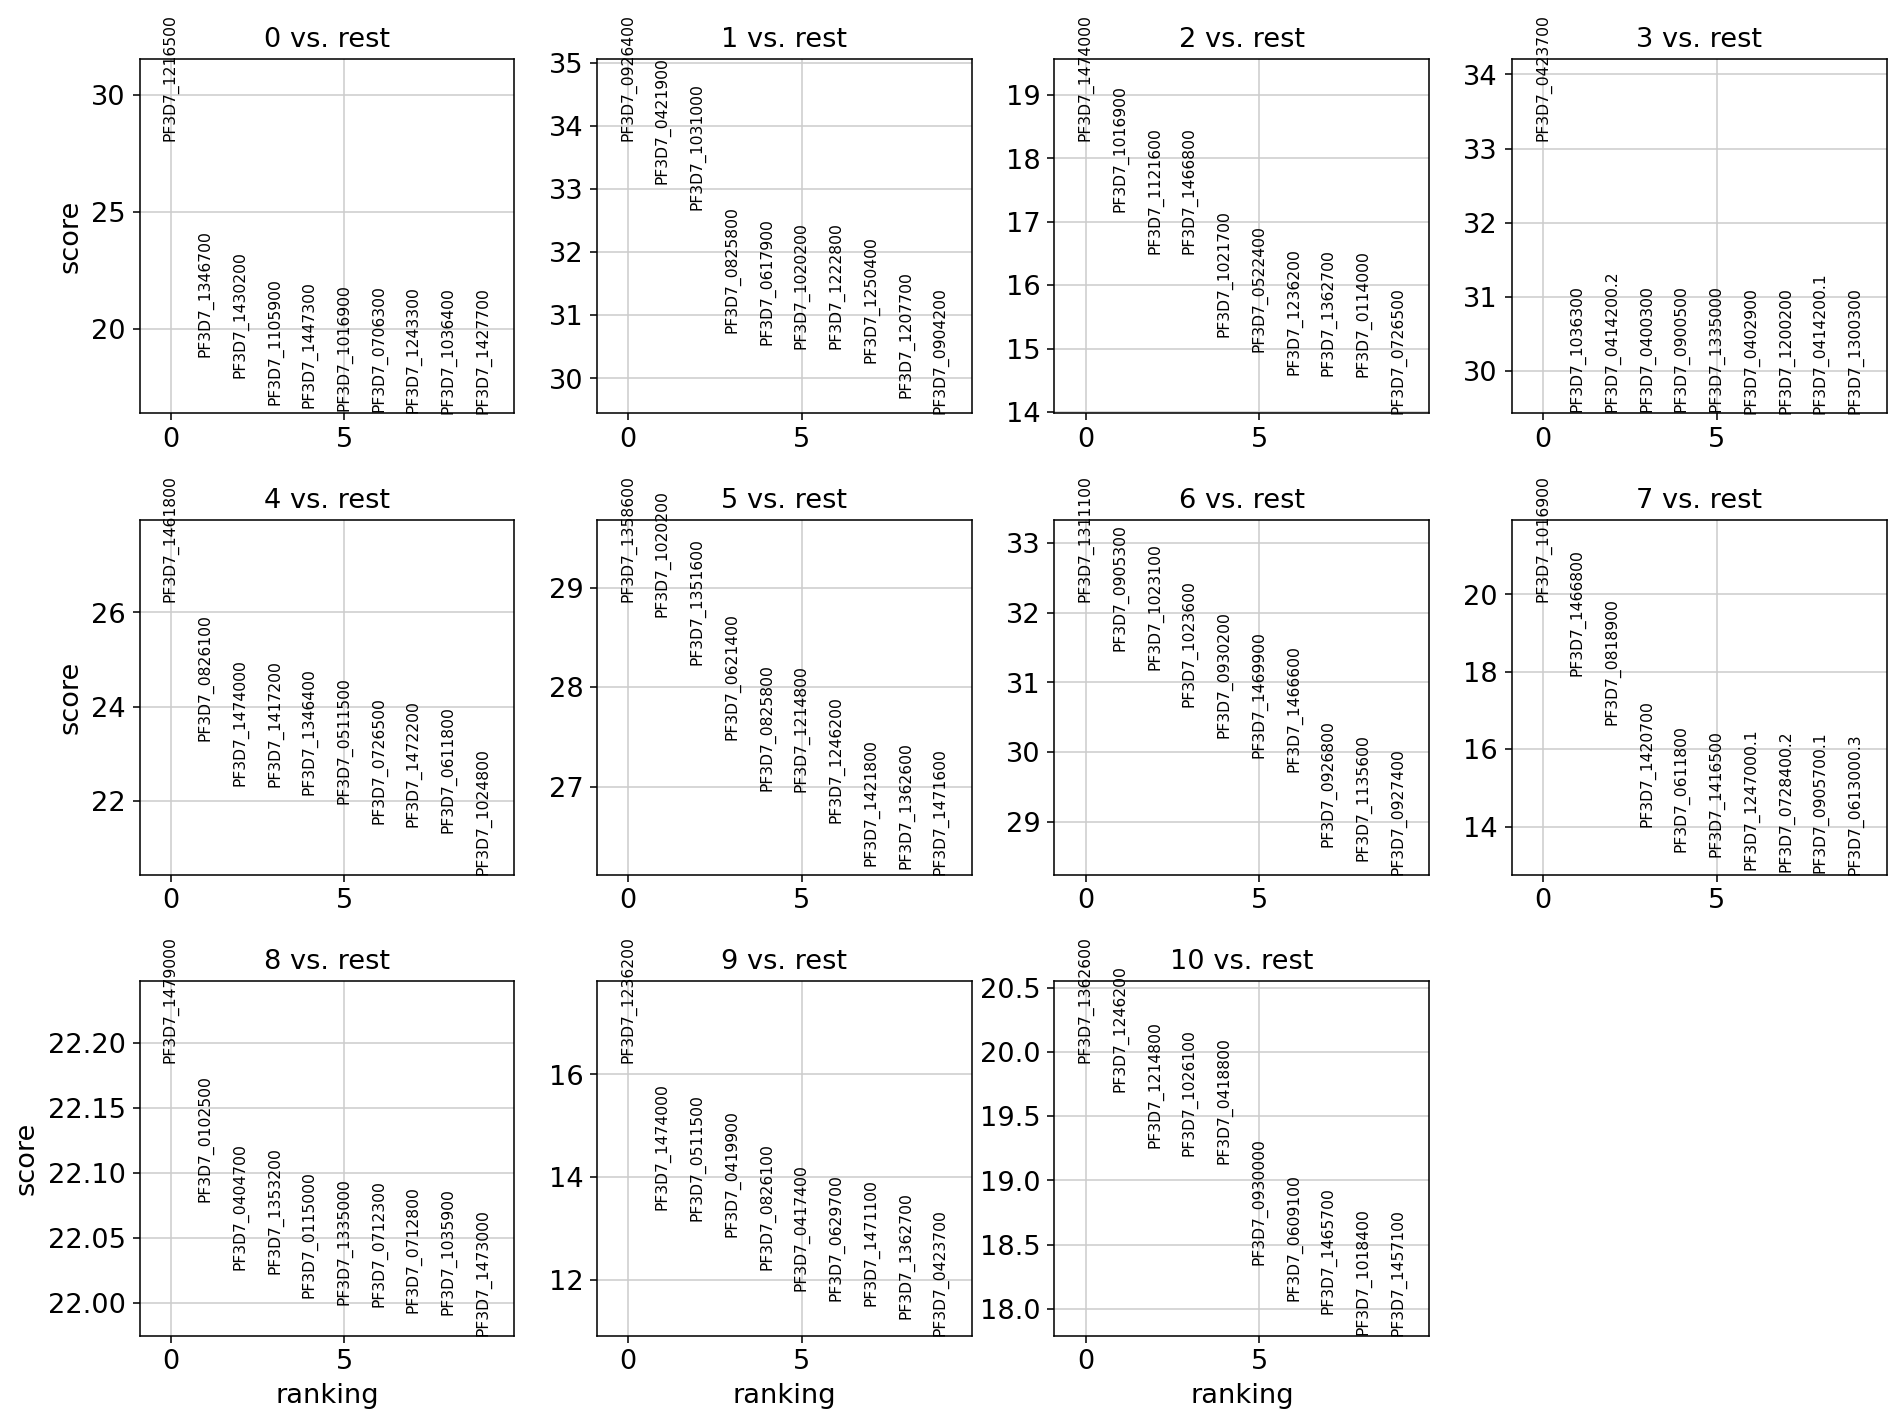

In [40]:
sc.pl.rank_genes_groups(
    adata = adata, 
    groupby = 'louvain_1.0', 
    n_genes=10, 
    sharey=False, 
    key="wilcoxon",)

In [31]:
adata.layers['raw_counts'] = adata.raw.X.copy()

In [34]:
adata

AnnData object with n_obs × n_vars = 4555 × 5019
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'n_counts', 'S_score', 'G2M_score', 'phase', 'louvain_0.4', 'leiden_0.4', 'louvain_0.6', 'leiden_0.6', 'louvain_0.8', 'leiden_0.8', 'louvain_0.9', 'leiden_0.9', 'louvain_1.0', 'leiden_1.0', 'louvain_1.1', 'leiden_1.1', 'louvain_1.2', 'leiden_1.2', 'louvain_1.4', 'leiden_1.4', 'louvain_1.6', 'leiden_1.6'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'ribo', 'hb', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'louvain', 'leiden', 'louvain_0.4_colors', 'louvain_0.6_colors', 'louvain_0.8_colors', 'louvain_0.9_colors', 'louvain_1.0_colors', 'louvain_1.1_colors', 'louvain_1.2_colors', 'louvain_1.4_col

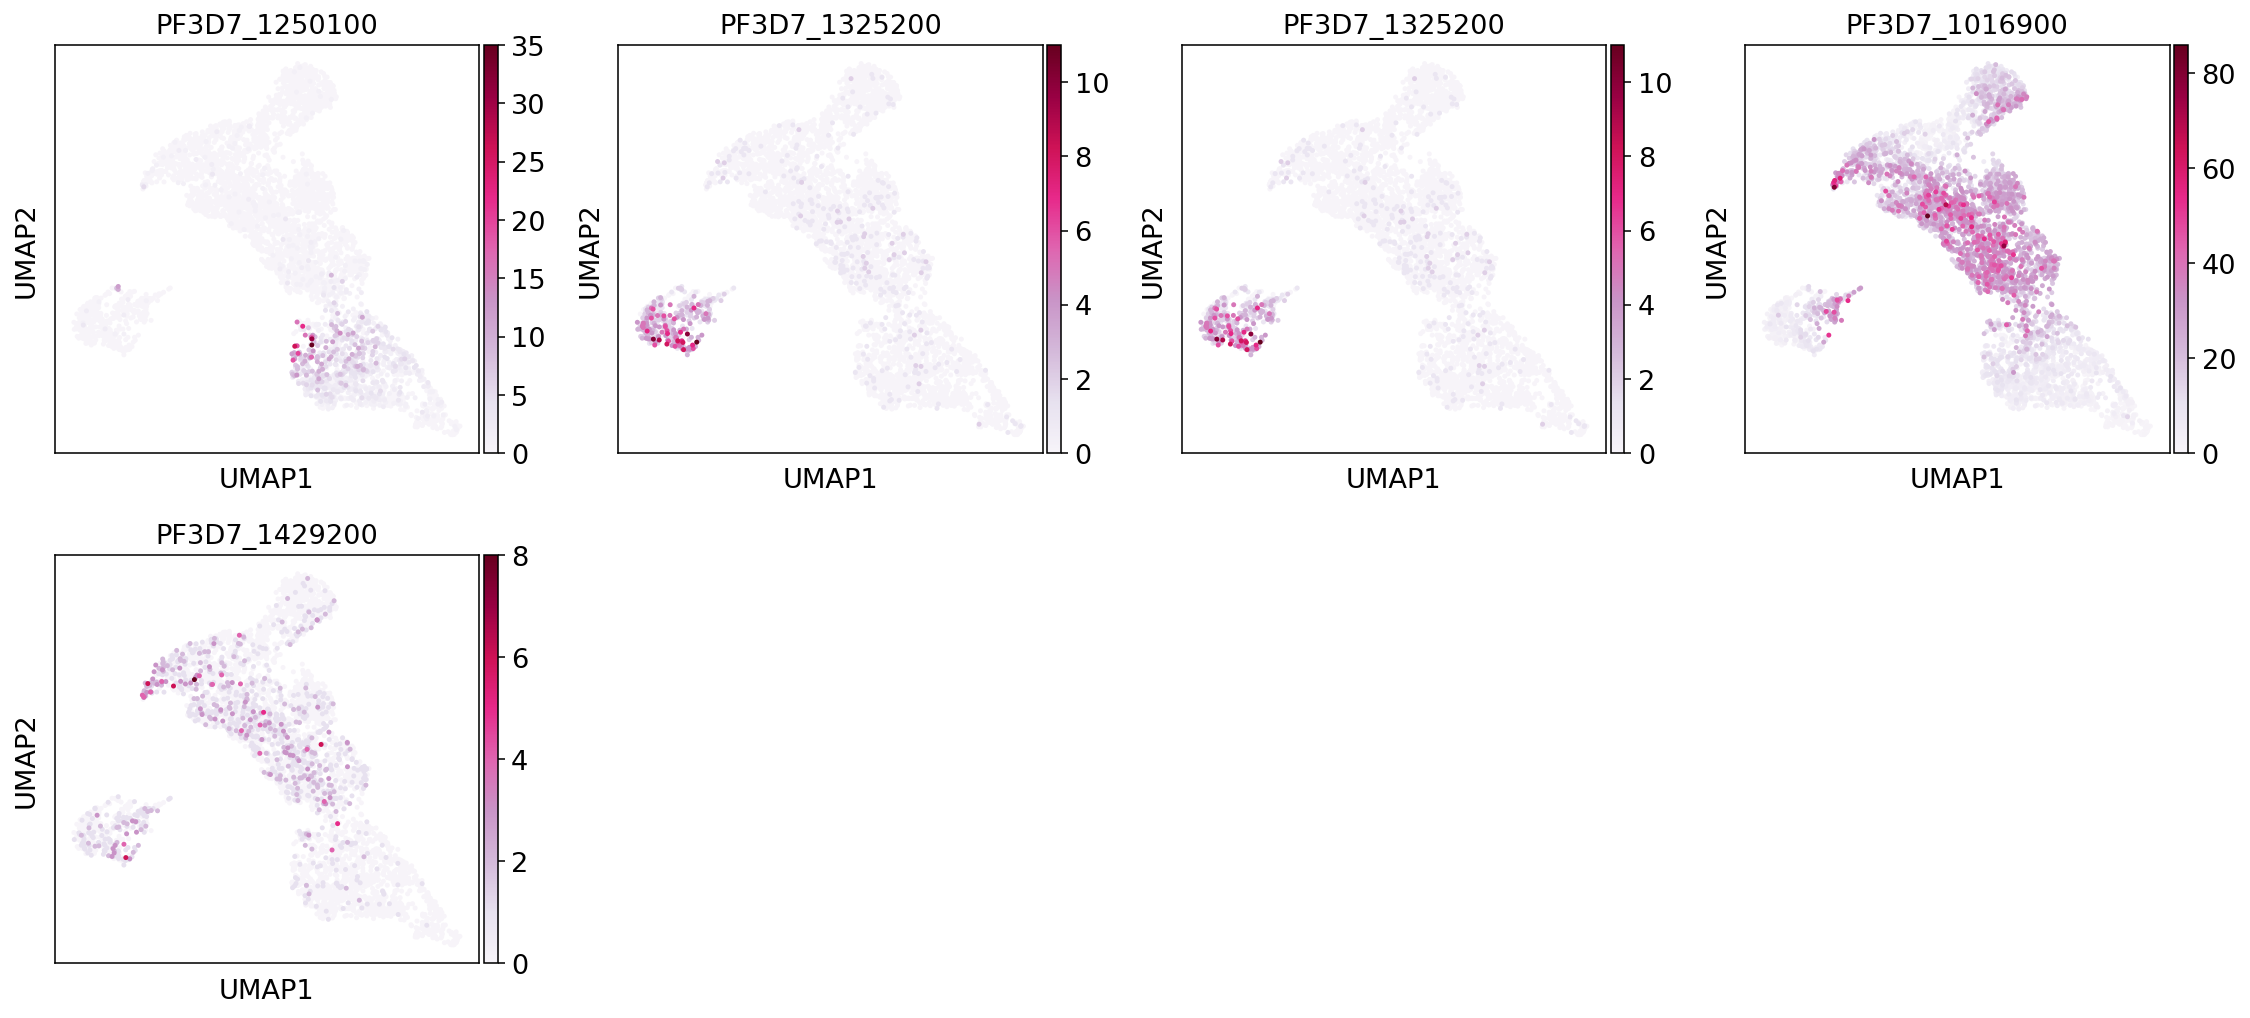

In [30]:
genes = ["PF3D7_1250100", "PF3D7_1325200", "PF3D7_1325200", "PF3D7_1016900", "PF3D7_1429200"]
sc.pl.umap(adata, color = genes, cmap="PuRd")